In [10]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier)

from sklearn.externals.six.moves import xrange
from sklearn.tree import DecisionTreeClassifier

Automatically created module for IPython interactive environment


In [11]:
n_classes = 3
n_estimators = 30
plot_colors = 'ryb'
cmap = plt.cm.RdYlBu
plot_step = .02
plot_step_coarser = 0.5
RANDOM_SEED = 13


In [12]:
iris = load_iris()

plot_idx = 1

models = [DecisionTreeClassifier(max_depth=None), 
          RandomForestClassifier(n_estimators=n_estimators), 
          ExtraTreesClassifier(n_estimators=n_estimators), 
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=n_estimators)]


('DecisionTree with features', [0, 1], 'has a score of ', 0.92666666666666664)
('RandomForest with 30 estimators with features', [0, 1], 'has a score of ', 0.92666666666666664)
('ExtraTrees with 30 estimators with features', [0, 1], 'has a score of ', 0.92666666666666664)
('AdaBoost with 30 estimators with features', [0, 1], 'has a score of ', 0.83999999999999997)
('DecisionTree with features', [0, 2], 'has a score of ', 0.99333333333333329)
('RandomForest with 30 estimators with features', [0, 2], 'has a score of ', 0.99333333333333329)
('ExtraTrees with 30 estimators with features', [0, 2], 'has a score of ', 0.99333333333333329)
('AdaBoost with 30 estimators with features', [0, 2], 'has a score of ', 0.99333333333333329)
('DecisionTree with features', [2, 3], 'has a score of ', 0.99333333333333329)
('RandomForest with 30 estimators with features', [2, 3], 'has a score of ', 0.99333333333333329)
('ExtraTrees with 30 estimators with features', [2, 3], 'has a score of ', 0.993333333333

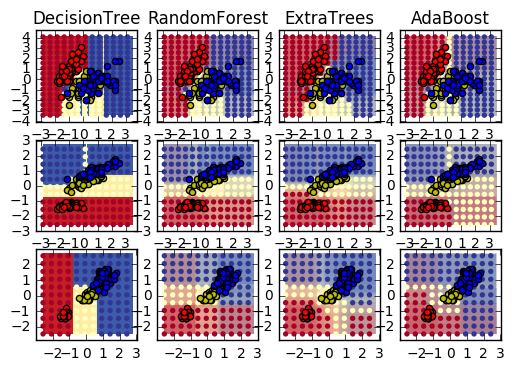

In [13]:
for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        X = iris.data[:, pair]
        y = iris.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        
        clf = clone(model)
        clf = model.fit(X, y)
        
        scores = clf.score(X, y)
        
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        model_details = model_title
        if hasattr(model, 'estimators_'):
            model_details += " with {} estimators".format(len(model.estimators_))
        print(model_details + " with features", pair, "has a score of ", scores)
        
        plt.subplot(3, 4 , plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title)
        
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), 
                             np.arange(y_min, y_max, plot_step))
        
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
        
        
        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser), 
                                             np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap, edgecolors='none')
        
        for i, c in zip(xrange(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i], cmap=cmap)
            
        plot_idx += 1
plt.axis('tight')
plt.show()